In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import plotly.express as px

In [2]:
members = pd.read_csv('member_information.csv')
visits = pd.read_csv('online_visits.csv')
sales = pd.read_csv('sales_data.csv')

In [3]:
# test = pd.merge(members, visits, on = 'member_id', how = 'inner')
# test.shape

In [4]:
#transform dates

date_columns = ['account_creation_date', 'client_since', 'first_visit_date']
for col in date_columns:
    members[col] = pd.to_datetime(members[col], dayfirst=True)

visits['date'] = pd.to_datetime(visits['date'], dayfirst=True)
    
sales['date'] = pd.to_datetime(sales['date'], dayfirst=True)

In [9]:
#filling missing values

members.fillna('Unknown', inplace=True)
visits.fillna('Unknown', inplace=True)
sales.fillna('Unknown', inplace=True)

In [11]:
#Calculate gross profit for each sale
sales['gross_profit'] = sales['gross_revenue'] - sales['gross_cogs']

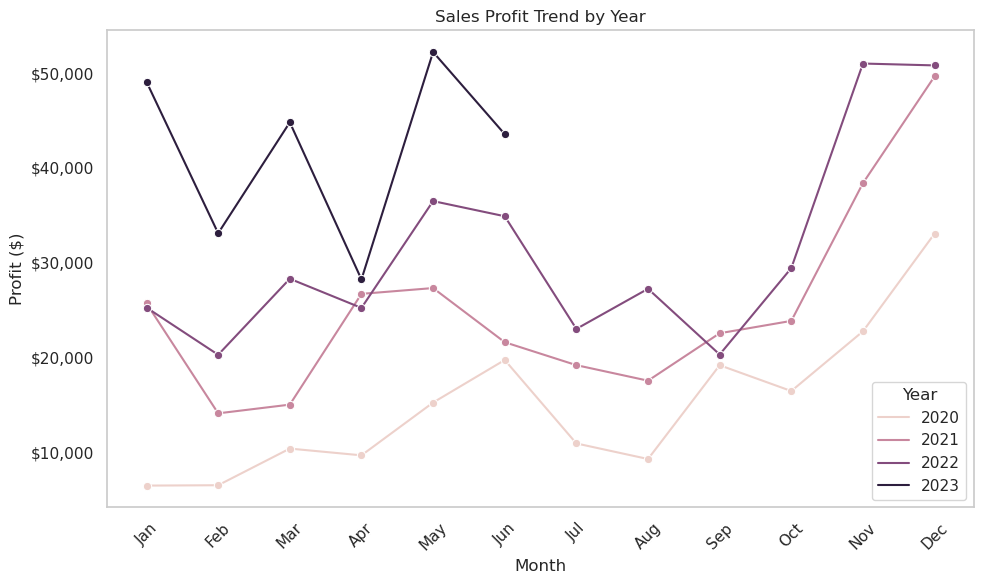

In [13]:
# Grouping data by year and month, and aggregating profit
sales['date'] = pd.to_datetime(sales['date'])  # Convert date column to datetime format
sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales_by_year_month = sales.groupby(['year', 'month']).agg({'gross_profit': 'sum'}).reset_index()

# Formatting month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_by_year_month['month_name'] = sales_by_year_month['month'].apply(lambda x: month_names[x - 1])


# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=sales_by_year_month, x='month_name', y='gross_profit', hue='year', marker='o')

plt.title('Sales Profit Trend by Year')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)

# Format y-axis as currency
from matplotlib.ticker import FuncFormatter
def currency_formatter(x, pos):
    return "${:,.0f}".format(x)
currency_format = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(currency_format)

# Moving the legend to the lower right and inside the chart area
plt.legend(title='Year', loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

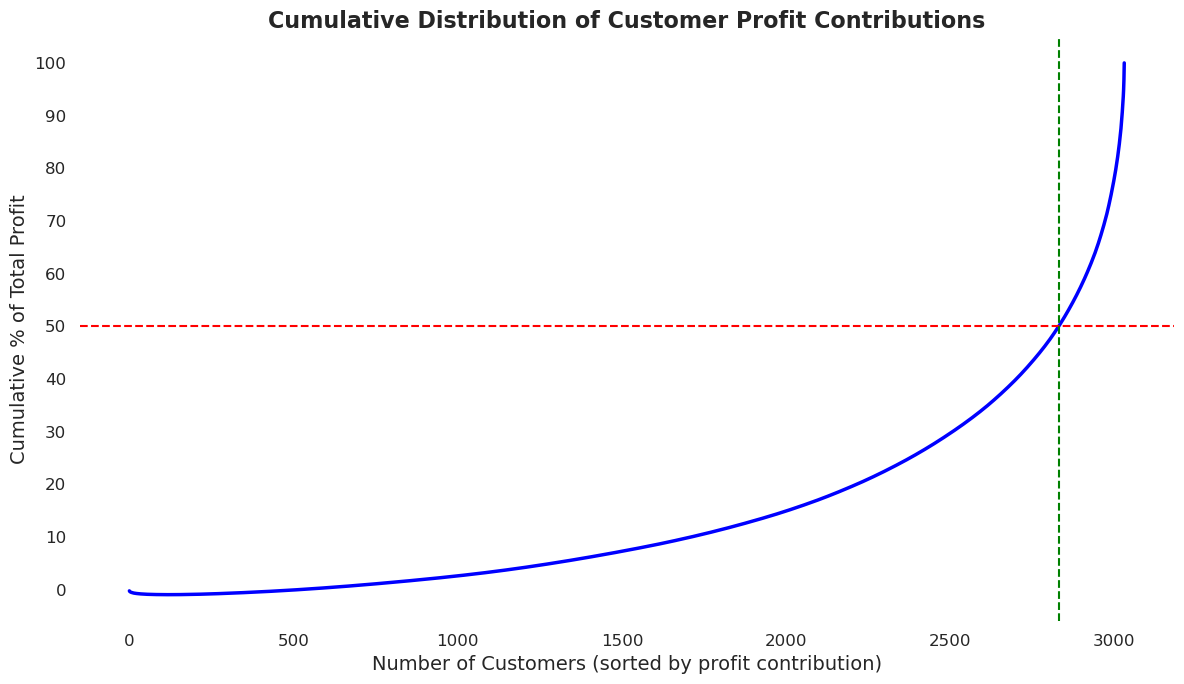

In [231]:
# Group by member_id and sum their profit contributions
customer_profit = sales.groupby('member_id')['gross_profit'].sum().reset_index()

sns.set_style("white")

customer_profit = customer_profit.sort_values(by="gross_profit").reset_index(drop=True)
customer_profit["cumulative_profit"] = customer_profit['gross_profit'].cumsum()
customer_profit["cumulative_percent"] = 100 * customer_profit["cumulative_profit"] / customer_profit['gross_profit'].sum()


plt.figure(figsize=(12, 7))

# Plotting the CDF
plt.plot(customer_profit.index, customer_profit["cumulative_percent"], color='blue', lw=2.5)

# Horizontal line at 50%
plt.axhline(50, color='red', linestyle='--', lw=1.5)

# Finding intersection of the curve with 50% to draw the vertical line
intersection_idx = np.where(customer_profit["cumulative_percent"] >= 50)[0][0]
plt.axvline(intersection_idx, color='green', linestyle='--', lw=1.5)

# Aesthetics
plt.title('Cumulative Distribution of Customer Profit Contributions', fontsize=16, fontweight='bold')
plt.xlabel('Number of Customers (sorted by profit contribution)', fontsize=14)
plt.ylabel('Cumulative % of Total Profit', fontsize=14)
plt.yticks(list(range(0, 110, 10)))

sns.despine(left=True, bottom=True)

# Adjusting ticks' font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [15]:
# Create a column for quarter and year
sales['quarter_year'] = sales['date'].dt.to_period('Q')

# Group data by quarter and year, calculate sum of 'gross_profit'
quarterly_profit = sales.groupby('quarter_year')['gross_profit'].sum()

# Calculate percentage change in profit from one quarter to the next
quarterly_profit_change = quarterly_profit.pct_change() * 100

# Create a new DataFrame for the table
quarterly_table = pd.DataFrame({
    'quarter_year': quarterly_profit.index,
    'profit_change_percent': quarterly_profit_change
})

# Display the table
print(quarterly_table)

             quarter_year  profit_change_percent
quarter_year                                    
2020Q1             2020Q1                    NaN
2020Q2             2020Q2              90.495648
2020Q3             2020Q3             -11.743634
2020Q4             2020Q4              83.254950
2021Q1             2021Q1             -24.114801
2021Q2             2021Q2              37.891364
2021Q3             2021Q3             -21.581167
2021Q4             2021Q4              88.570469
2022Q1             2022Q1             -33.977728
2022Q2             2022Q2              30.798901
2022Q3             2022Q3             -26.934491
2022Q4             2022Q4              85.859072
2023Q1             2023Q1              -3.248067
2023Q2             2023Q2              -2.335073


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



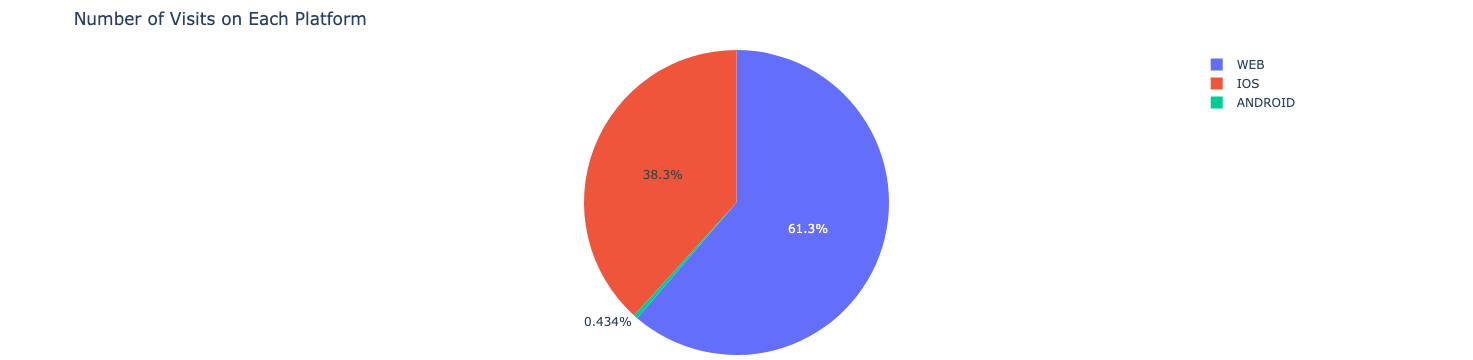

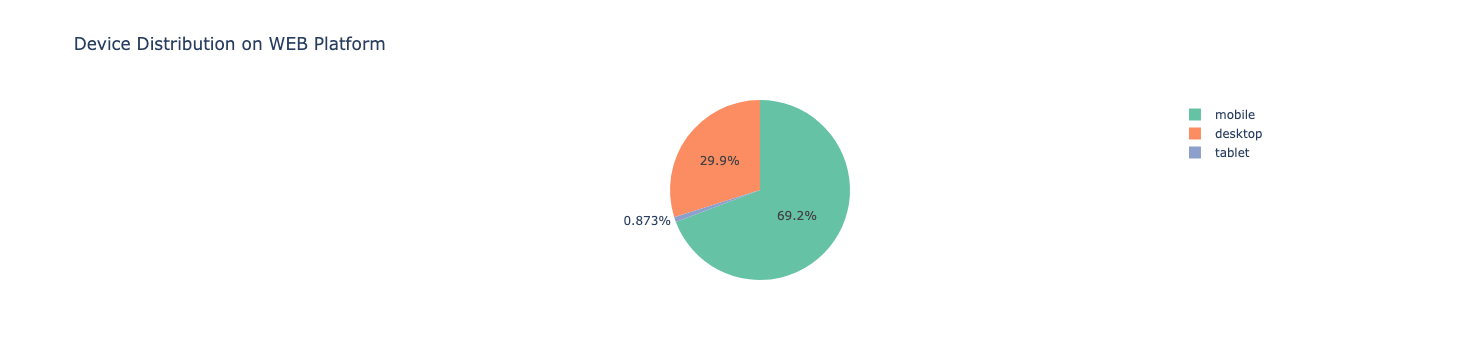

In [189]:
import plotly.express as px

# Grouping data by platform and calculating the number of visits
platform_visits = visits['platform'].value_counts()

# Creating a pie chart for platform distribution
fig = px.pie(platform_visits,
             labels=platform_visits.index,
             values=platform_visits,
             title='Number of Visits on Each Platform',
             names=platform_visits.index
             # hole=0.4,
             # color_discrete_sequence=px.colors.qualitative.Pastel
            )

# Grouping data by device for the WEB platform
web_platform = visits[visits['platform'] == 'WEB']
web_device_counts = web_platform['device'].value_counts()

# Creating a pie chart for device distribution on WEB platform
fig2 = px.pie(web_device_counts,
              labels=web_device_counts.index,
              values=web_device_counts,
              title='Device Distribution on WEB Platform',
              names=web_device_counts.index,
              # hole=0.4,
              color_discrete_sequence=px.colors.qualitative.Set2
             )

# Update layout for subplots
fig.update_layout(
    grid={'rows': 1, 'columns': 2},
    margin=dict(l=0, r=0, b=0, t=50),
    width=800
)

# Display the charts
fig.show()
fig2.show()

In [23]:
# Group by member_id and shipping_region_name
gross_profit_region = sales.groupby(['member_id', 'shipping_region_name'])['gross_profit'].sum().reset_index()

# Sort by gross profit and drop duplicate member_ids while retaining the entry with the highest profit
gross_profit_region_sorted = gross_profit_region.sort_values(by='gross_profit', ascending=False)
gross_profit = gross_profit_region_sorted.drop_duplicates(subset='member_id', keep='first')

In [366]:
# Group by member_id and count unique shipping_region_name
multi_region_orders = sales.groupby('member_id')['shipping_region_name'].nunique()

# Filter clients who have ordered in multiple regions
clients_multi_region = multi_region_orders[multi_region_orders > 1].index

print(len(clients_multi_region))

37


In [368]:
# # Assuming top_50_clients is a DataFrame or Series containing the top 50% most profitable client IDs
# top_50_clients_ids = top_50_clients['member_id'].tolist()

# # Check which multi-region clients are in the top 50%
# multi_region_top_50_clients = [client for client in clients_multi_region if client in top_50_clients_ids]

# # Display those clients
# print(multi_region_top_50_clients)

# # Display the count of those clients
# print(len(multi_region_top_50_clients))


In [25]:
#Sort clients by gross profit in descending order
gross_profit_sorted = gross_profit.sort_values(by='gross_profit', ascending=False)

In [27]:
#Identify the top 50% clients
gross_profit_sorted['cumulative_gross_profit'] = gross_profit_sorted['gross_profit'].cumsum()
total_gross_profit = gross_profit_sorted['gross_profit'].sum()
top_50_percent_threshold = total_gross_profit * 0.5

In [29]:
#Determine a gross profit threshold that captures the top 50% clients
top_clients = gross_profit_sorted[gross_profit_sorted['cumulative_gross_profit'] <= top_50_percent_threshold]

In [45]:
low_clients = gross_profit_sorted[gross_profit_sorted['cumulative_gross_profit'] > top_50_percent_threshold]

In [49]:
low_clients.shape[0]+top_clients.shape[0]

3031

In [33]:
#Average ticket of top clients
average_ticket_top_clients = top_clients['gross_profit'].mean()

In [35]:
print(f"Number of top clients (50% of revenue): {top_clients.shape[0]}")
print(f"Average ticket of top clients: ${average_ticket_top_clients:.2f}")

Number of top clients (50% of revenue): 199
Average ticket of top clients: $2755.06


In [55]:
#Average ticket of top clients
average_ticket_low_clients = low_clients['gross_profit'].mean()
print(f"Number of low clients (50% of revenue): {low_clients.shape[0]}")
print(f"Average ticket of low clients: ${average_ticket_low_clients:.2f}")

Number of low clients (50% of revenue): 2832
Average ticket of low clients: $193.84


In [57]:
# Percent of top clients
(top_clients.member_id.nunique()/gross_profit_sorted.member_id.nunique())*100

6.5654899373144175

In [41]:
min_ticket_top_clients = top_clients['gross_profit'].min()
max_ticket_top_clients = top_clients['gross_profit'].max()

print(f"Minimum ticket of top clients: ${min_ticket_top_clients:.2f}")
print(f"Maximum ticket of top clients: ${max_ticket_top_clients:.2f}")

Minimum ticket of top clients: $1059.25
Maximum ticket of top clients: $33519.59


In [51]:
min_ticket_low_clients = low_clients['gross_profit'].min()
max_ticket_low_clients = top_clients['gross_profit'].max()

print(f"Minimum ticket of low clients: ${min_ticket_low_clients:.2f}")
print(f"Maximum ticket of low clients: ${max_ticket_low_clients:.2f}")

Minimum ticket of low clients: $-2086.53
Maximum ticket of low clients: $33519.59


In [43]:
# Number of unique clients who made at least one purchase 
total_clients = sales['member_id'].nunique()

print(f"Total number of clients: {total_clients}")


Total number of clients: 3031


In [59]:
# Merge the top clients' data with the sales data to get the frequency of buying
top_clients_sales = pd.merge(top_clients, sales, on='member_id', how='inner')

# Calculate the frequency of buying for each top client
top_clients_frequency = top_clients_sales.groupby('member_id')['date'].count().reset_index()
top_clients_frequency.rename(columns={'date': 'buy_frequency'}, inplace=True)

# Merge the frequency data back with the top_clients DataFrame
top_clients_with_frequency = pd.merge(top_clients, top_clients_frequency, on='member_id', how='left')

#Average ticket of top clients
average_top_client_frequency = top_clients_with_frequency['buy_frequency'].mean()


print(f"Number of top clients (50% of revenue): {top_clients.shape[0]}")
print(f"Average buying frequency: {average_top_client_frequency:.2f}")

Number of top clients (50% of revenue): 199
Average buying frequency: 19.77


In [61]:
# Merge the top clients' data with the sales data to get the frequency of buying
low_clients_sales = pd.merge(low_clients, sales, on='member_id', how='inner')

# Calculate the frequency of buying for each top client
low_clients_frequency = low_clients_sales.groupby('member_id')['date'].count().reset_index()
low_clients_frequency.rename(columns={'date': 'buy_frequency'}, inplace=True)

# Merge the frequency data back with the top_clients DataFrame
low_clients_with_frequency = pd.merge(low_clients, low_clients_frequency, on='member_id', how='left')

#Average ticket of top clients
average_low_client_frequency = low_clients_with_frequency['buy_frequency'].mean()


print(f"Number of low clients (50% of revenue): {low_clients.shape[0]}")
print(f"Average buying frequency: {average_low_client_frequency:.2f}")

Number of low clients (50% of revenue): 2832
Average buying frequency: 2.45


In [396]:
top_clients_sales = pd.merge(top_clients, sales, on='member_id', how='inner')
top_clients_sales.shape

(3934, 20)

In [65]:
# # Merge the top clients' data with the sales data to get the frequency of buying
# top_clients_sales = pd.merge(top_clients, sales, on='member_id', how='inner')

# # Pivot the data to get yearly profit for each top client
# pivot_table = pd.pivot_table(top_clients_sales, values='gross_profit', index='member_id', columns='year', aggfunc='sum')

# # Select the top 50 clients
# top_50_clients = pivot_table.sum().sort_values(ascending=False).head(50).index
# top_50_clients_data = pivot_table.loc[top_50_clients]

# # Plotting
# plt.figure(figsize=(10, 6))
# sns.set_palette("tab10")

# for year in top_50_clients_data.columns:
#     plt.plot(top_50_clients_data.index, top_50_clients_data[year], label=str(year))

# plt.xlabel('Client')
# plt.ylabel('Profit ($)')
# plt.title('Sales Profit Trends for Top 50 Clients')
# plt.xticks(rotation=90)
# plt.legend(title='Year')
# plt.tight_layout()

# plt.show()

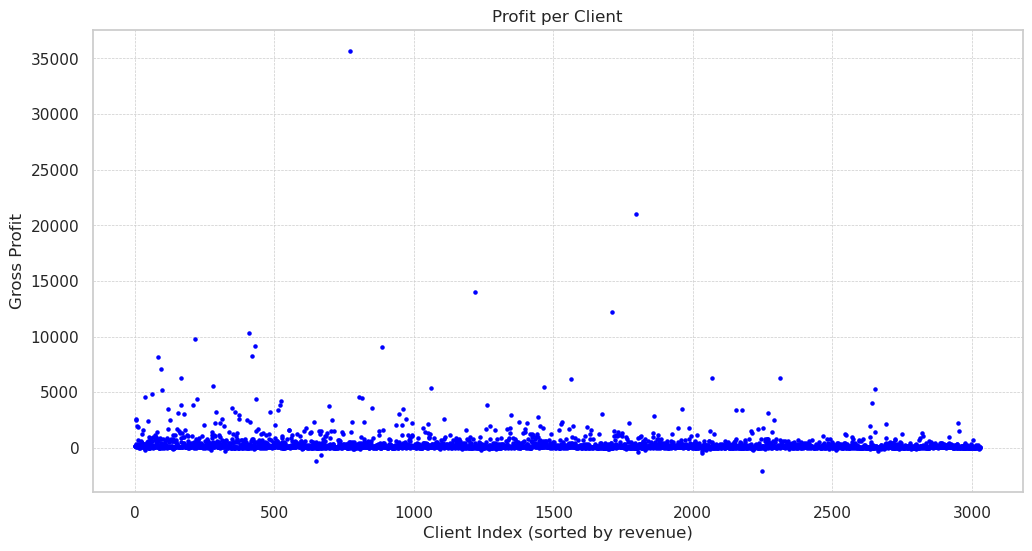

In [69]:
# Aggregate profit per client 
profit_per_client = sales.groupby('member_id')['gross_profit'].sum().reset_index()

# Sort the dataframe by gross profit for a meaningful visualization
profit_per_client = profit_per_client.sort_values(by='gross_profit', ascending=False)

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(profit_per_client.index, profit_per_client['gross_profit'], color='blue', s=5)
plt.title('Profit per Client')
plt.xlabel('Client Index (sorted by revenue)')
plt.ylabel('Gross Profit')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [97]:
low_clients[low_clients['member_id'] == 66359611]

,member_id,shipping_region_name,gross_profit,cumulative_gross_profit


In [99]:
gross_profit_sorted.shape

(3031, 4)

In [71]:
# Merge gross_profit_2022_sorted with sales to get shipping_region_name
gross_profit_with_country = pd.merge(gross_profit_sorted, low_clients[['member_id', 'shipping_region_name']].drop_duplicates(), on='member_id', how='left')

In [73]:
print(gross_profit_with_country[gross_profit_with_country['cumulative_gross_profit'] <= top_50_percent_threshold].shape[0])

206


In [75]:
clients_revenue = gross_profit_sorted.groupby(['member_id', 'shipping_region_name']).agg({'gross_profit': 'sum'}).reset_index()

In [143]:
#clients_revenue['gross_profit'] = clients_revenue['gross_revenue'] - sales.groupby(['member_id']).agg({'gross_cogs': 'sum'}).reset_index()['gross_cogs']

In [77]:
clients_revenue = clients_revenue.sort_values(by='gross_profit', ascending=False)
clients_revenue['cumulative_gross_profit'] = clients_revenue['gross_profit'].cumsum()


In [147]:
#top_50_percent_threshold = clients_revenue['gross_profit'].sum() * 0.5

In [149]:
#top_50_clients = clients_revenue[clients_revenue['cumulative_gross_profit'] <= top_50_percent_threshold]

In [103]:
low_clients_by_region = low_clients['shipping_region_name'].value_counts()
top_clients_by_region = top_clients['shipping_region_name'].value_counts()


In [105]:
top_clients_by_region

United States           115
Canada                   54
China                     9
Australia                 5
Malaysia                  2
Japan                     2
France                    2
United Arab Emirates      2
Hong Kong                 2
Kazakhstan                1
Kuwait                    1
United Kingdom            1
Taiwan                    1
Saudi Arabia              1
Korea (South)             1
Name: shipping_region_name, dtype: int64

In [109]:
low_clients_by_region

United States           1482
Canada                   532
United Kingdom           193
Japan                    179
Australia                104
Korea (South)             55
China                     51
France                    43
Germany                   40
Hong Kong                 33
Switzerland               11
Italy                      9
Taiwan                     9
Denmark                    7
Puerto Rico                7
United Arab Emirates       7
Singapore                  6
Sweden                     6
Spain                      5
Norway                     5
Chile                      4
Ireland                    4
Saudi Arabia               4
Belgium                    4
Netherlands                4
Macau                      3
Russian Federation         3
Poland                     3
Kuwait                     2
Philippines                2
Qatar                      2
Iceland                    2
Malaysia                   2
Austria                    1
Hungary       

In [107]:
low_clients_by_region

United States           1597
Canada                   586
United Kingdom           194
Japan                    181
Australia                109
China                     60
Korea (South)             56
France                    45
Germany                   40
Hong Kong                 35
Switzerland               11
Taiwan                    10
United Arab Emirates       9
Italy                      9
Denmark                    7
Puerto Rico                7
Sweden                     6
Singapore                  6
Saudi Arabia               5
Spain                      5
Norway                     5
Belgium                    4
Ireland                    4
Chile                      4
Netherlands                4
Malaysia                   4
Macau                      3
Kuwait                     3
Poland                     3
Russian Federation         3
Qatar                      2
Iceland                    2
Philippines                2
Brazil                     1
India         

In [111]:
low_clients.shape

(2832, 4)

In [113]:
clients_revenue.member_id.nunique()

3031

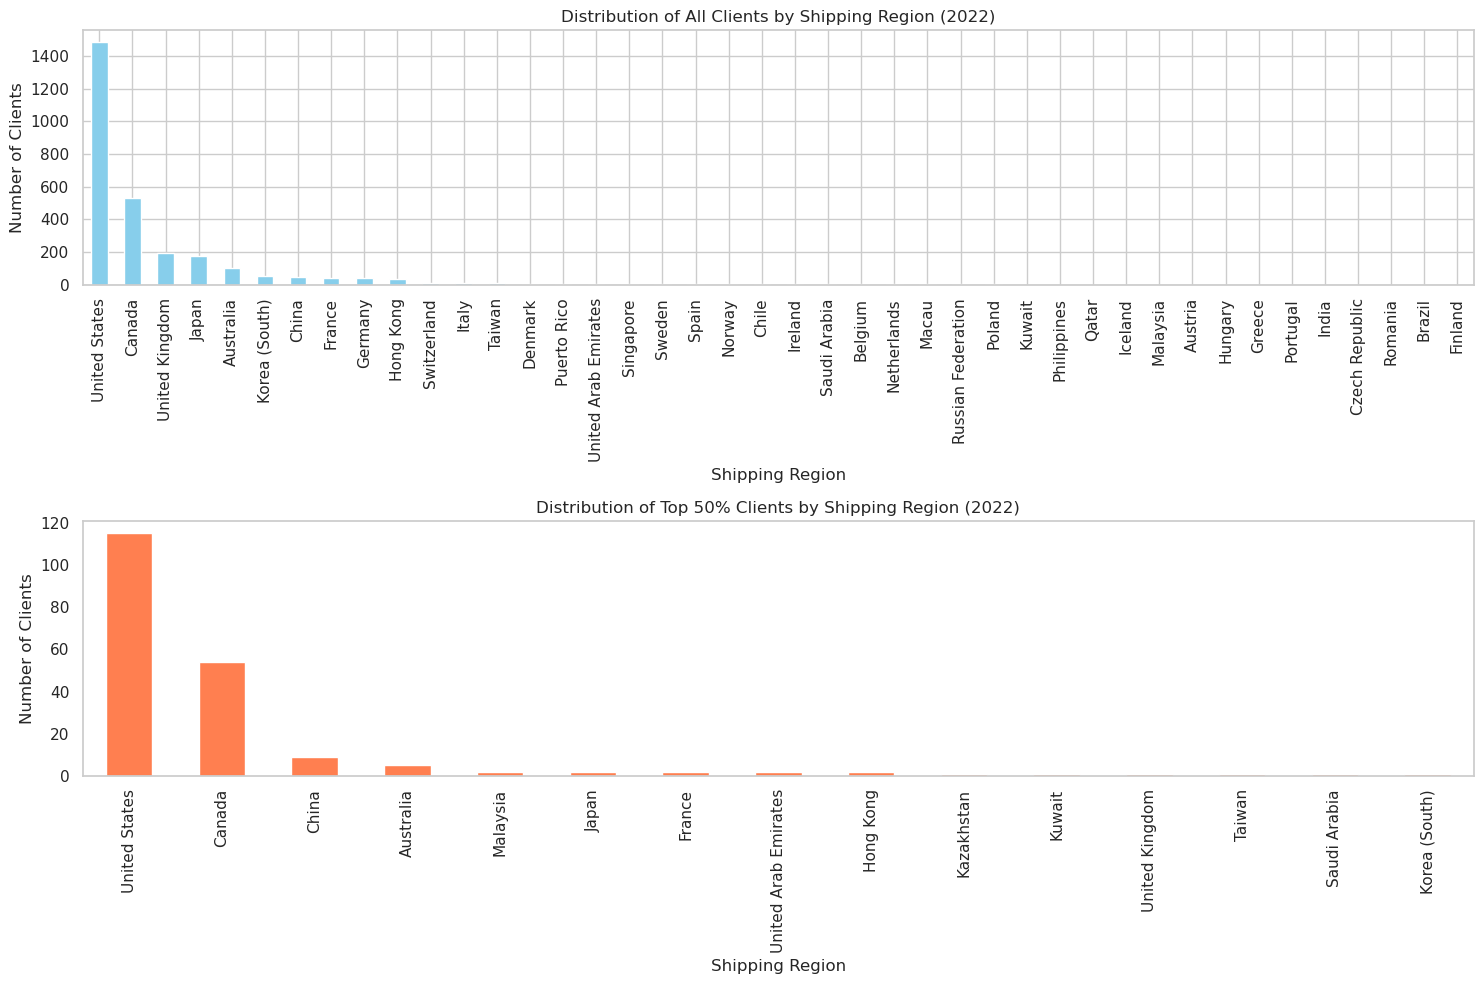

In [201]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# All clients
low_clients_by_region.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of All Clients by Shipping Region (2022)')
ax[0].set_xlabel('Shipping Region')
ax[0].set_ylabel('Number of Clients')

# Top 50% clients
top_clients_by_region.plot(kind='bar', ax=ax[1], color='coral')
ax[1].set_title('Distribution of Top 50% Clients by Shipping Region (2022)')
ax[1].set_xlabel('Shipping Region')
ax[1].set_ylabel('Number of Clients')
plt.grid(False)
plt.tight_layout()
plt.show()

In [133]:
top_50_segment_counts

1    2067
0    1867
Name: is_markdown, dtype: int64

In [171]:
sales.head()

,date,member_id,sku,category_level_1,category_level_2,category_level_3,brand,shipping_region_name,gross_units_sold,is_markdown,gross_revenue,gross_cogs,net_unit_sold,gross_profit,year,month,quarter_year
0,2023-01-07,98303791,9924851,MEN,CLOTHING,SHIRTS,Rick Owens,United States,1,1,289.952798,177.036400,1,112.916398,2023,1,2023Q1
1,2020-11-28,37813041,5189351,WOMEN,SHOES,BOOTS,Dr. Martens,United States,1,1,145.435658,83.600000,1,61.835658,2020,11,2020Q4
2,2023-01-07,98303791,9800251,MEN,CLOTHING,SHIRTS,Theory,United States,1,1,94.403237,81.660000,1,12.743237,2023,1,2023Q1
3,2023-04-29,79909811,11337021,MEN,CLOTHING,SHORTS,Essentials,United States,1,0,95.044128,48.168316,1,46.875812,2023,4,2023Q2
4,2022-07-31,72097161,8937731,WOMEN,CLOTHING,SWEATERS,AMI Alexandre Mattiussi,United States,1,1,0.012824,176.311038,0,-176.298214,2022,7,2022Q3


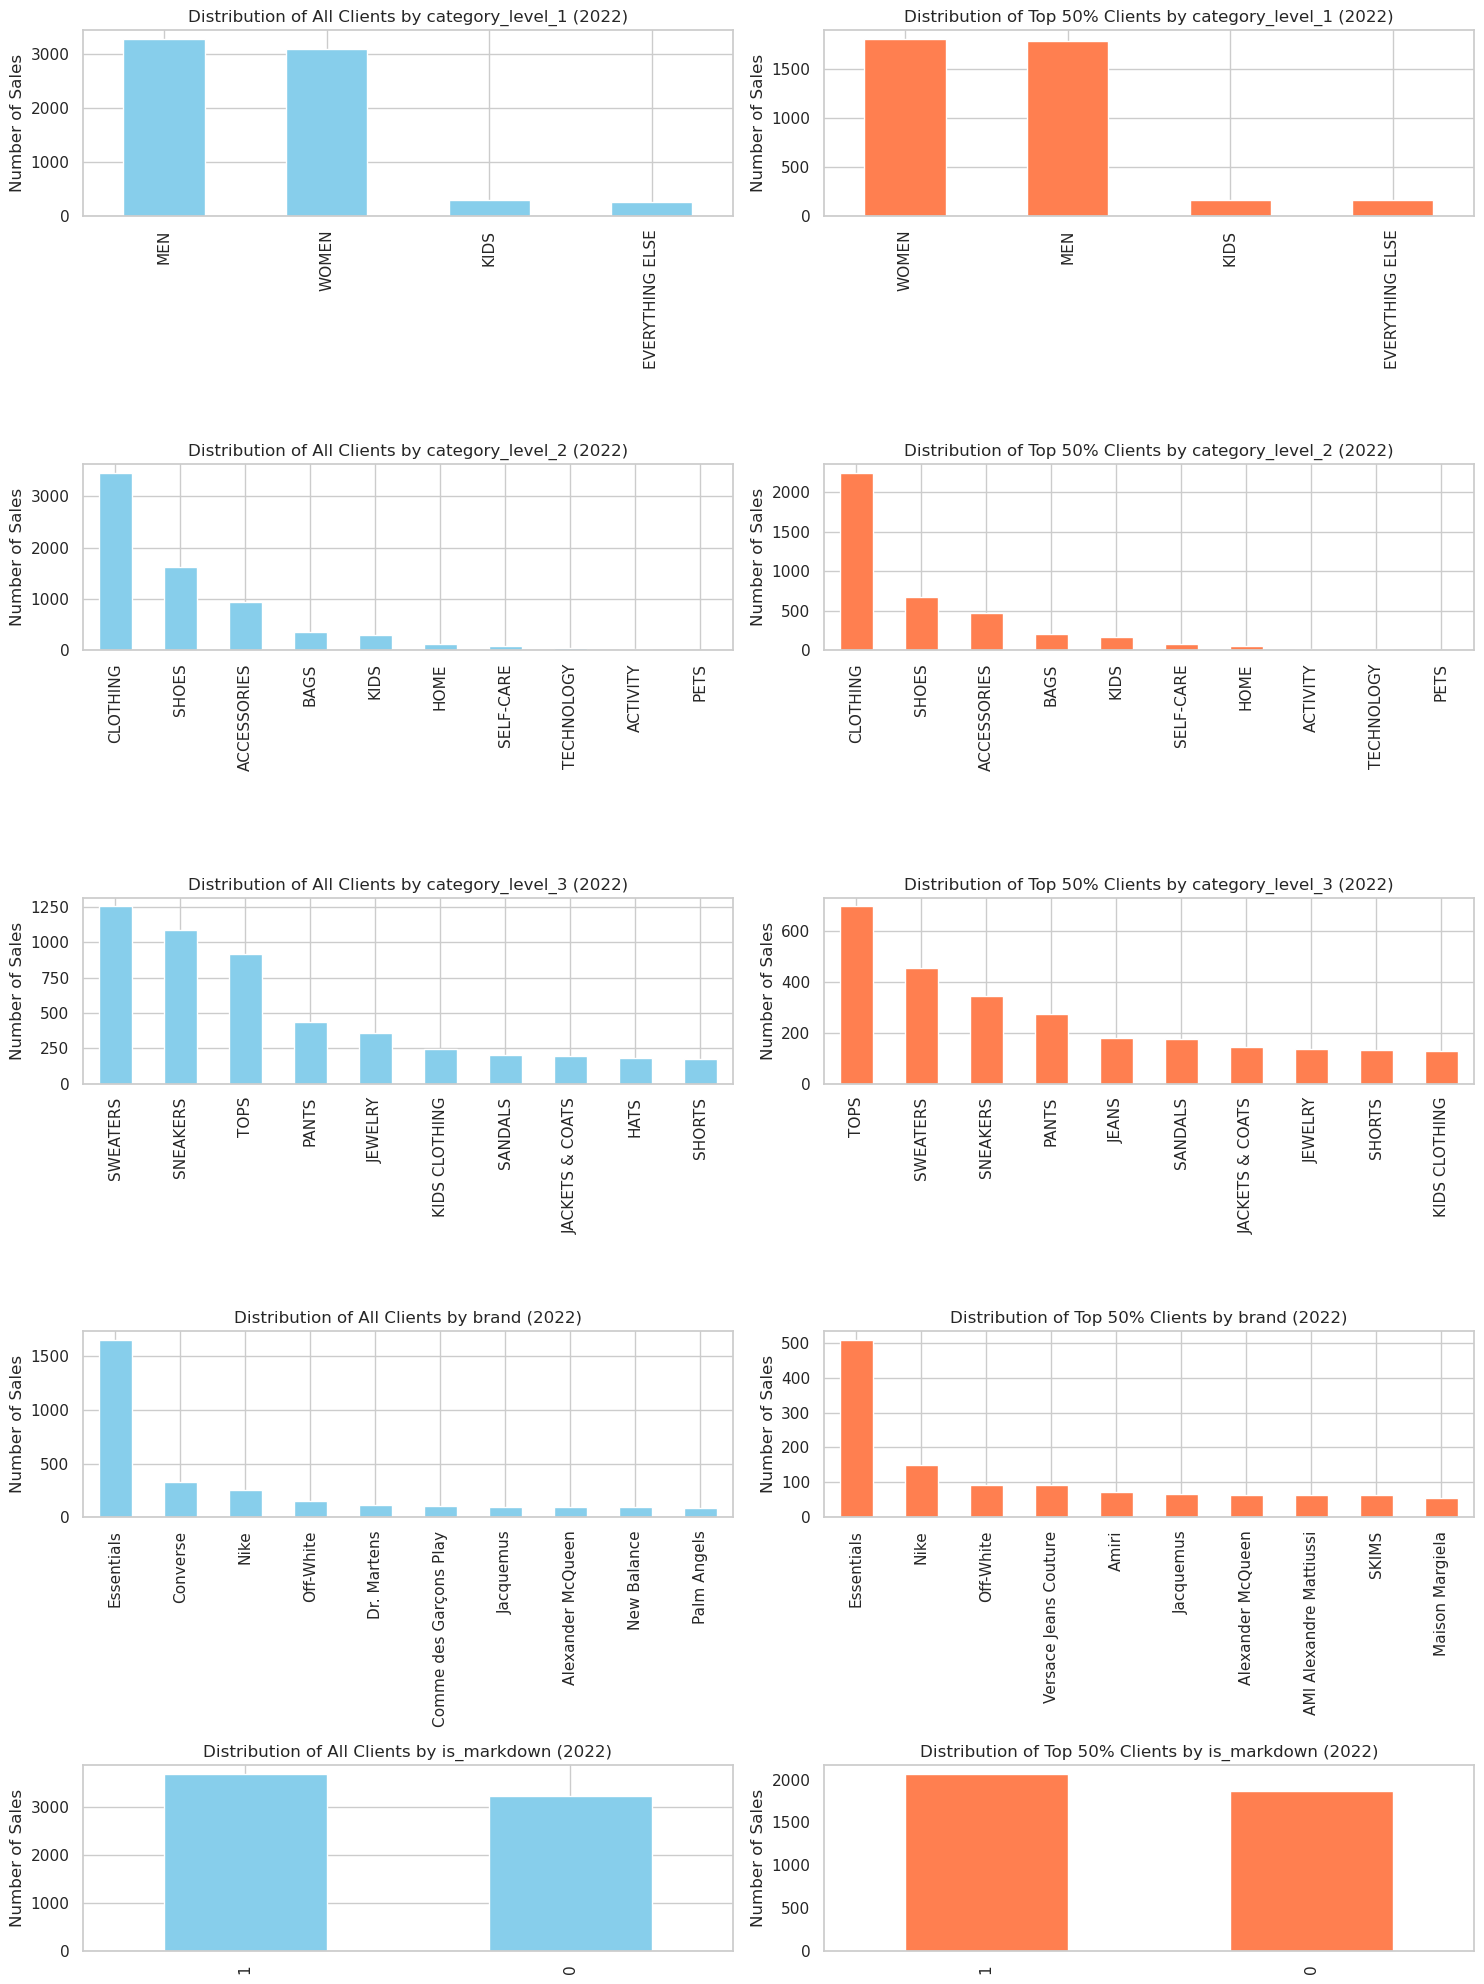

In [205]:
# List of columns to segment by
segmentation_columns = ['category_level_1', 'category_level_2', 'category_level_3', 'brand', 'is_markdown']

# Create a figure with 4x2 subplots (for total and top 50% across the 4 segmentation columns)
fig, ax = plt.subplots(len(segmentation_columns), 2, figsize=(15, 20))

for idx, col in enumerate(segmentation_columns):
    # Get value counts for total clients and top 50% clients
    # total_segment_counts = sales[col].value_counts().head(10) if col in ['category_level_3', 'brand'] else sales[col].value_counts()
    
    low_50_segment_counts = sales[sales['member_id'].isin(low_clients['member_id'])][col].value_counts().head(10)if col in ['category_level_3', 'brand'] else sales[sales['member_id'].isin(low_clients['member_id'])][col].value_counts()
        
    top_50_segment_counts = sales[sales['member_id'].isin(top_clients['member_id'])][col].value_counts().head(10)if col in ['category_level_3', 'brand'] else sales[sales['member_id'].isin(top_clients['member_id'])][col].value_counts()
    
    # Plot for all clients
    low_50_segment_counts.plot(kind='bar', ax=ax[idx, 0], color='skyblue')
    ax[idx, 0].set_title(f'Distribution of All Clients by {col} (2022)')
    ax[idx, 0].set_ylabel('Number of Sales')
    
    # Plot for top 50% clients
    top_50_segment_counts.plot(kind='bar', ax=ax[idx, 1], color='coral')
    ax[idx, 1].set_title(f'Distribution of Top 50% Clients by {col} (2022)')
    ax[idx, 1].set_ylabel('Number of Sales')
plt.grid(False)
# Adjust layout
plt.tight_layout()
plt.show()




In [163]:
low_50_segment_counts.head()

1    34.047247
0    29.791341
Name: is_markdown, dtype: float64

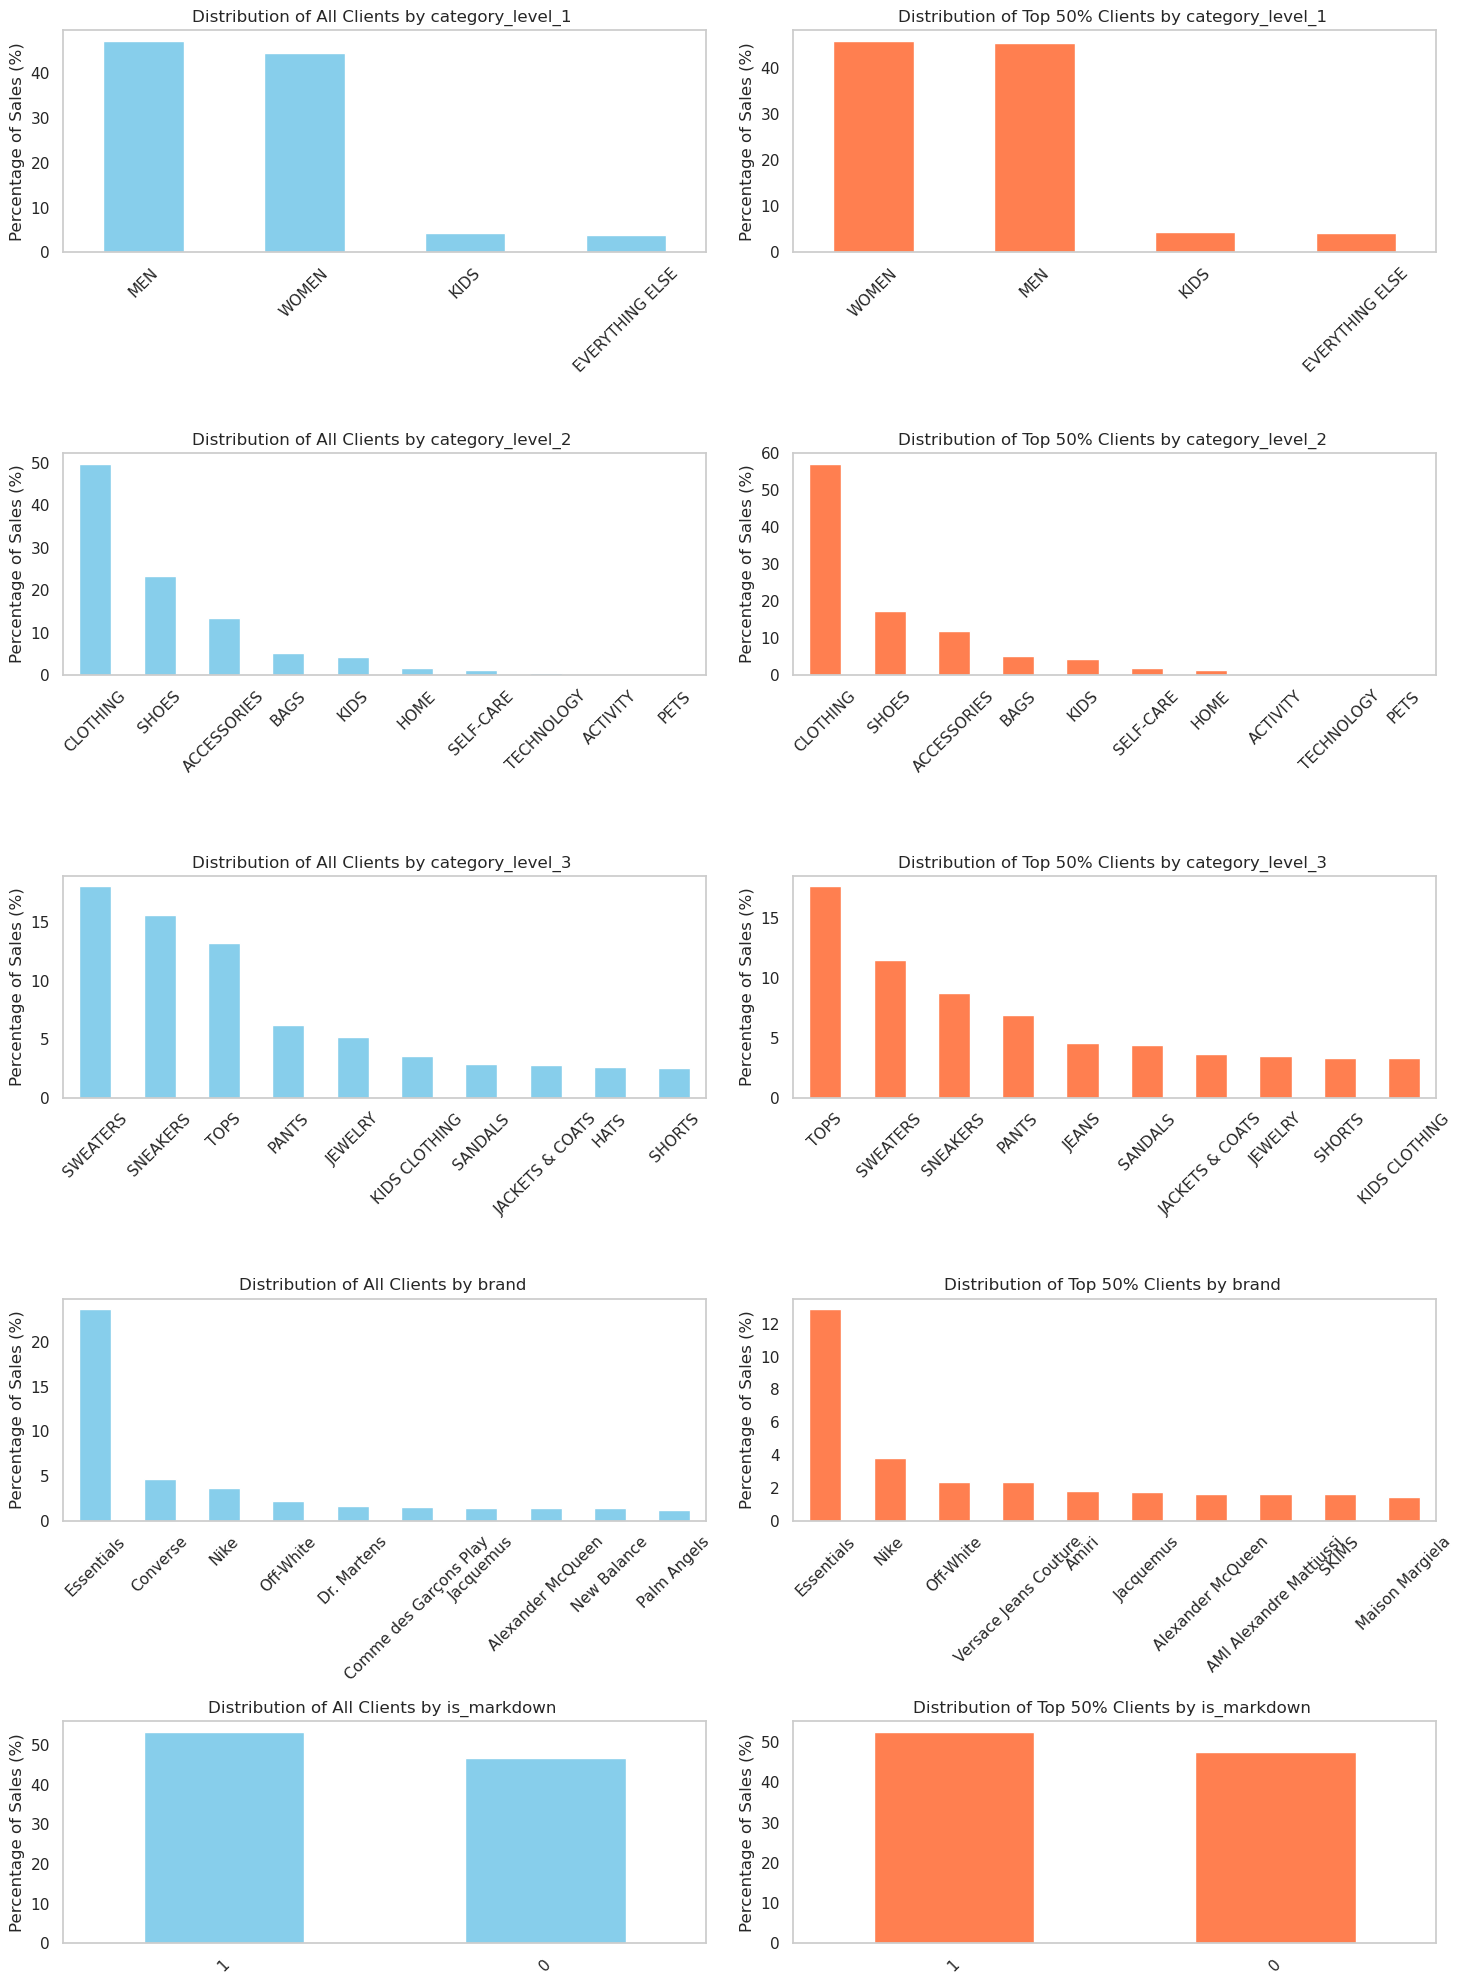

In [227]:
# List of columns to segment by
segmentation_columns = ['category_level_1', 'category_level_2', 'category_level_3', 'brand', 'is_markdown']

# Create a figure with 4x2 subplots (for total and top 50% across the 4 segmentation columns)
fig, ax = plt.subplots(len(segmentation_columns), 2, figsize=(15, 20))

for idx, col in enumerate(segmentation_columns):
    # Get value counts for total clients and top 50% clients
    low_50_sales_count = sales[sales['member_id'].isin(low_clients['member_id'])][col].count()
    top_50_sales_count = sales[sales['member_id'].isin(top_clients['member_id'])][col].count()
    
    low_50_segment_counts = (sales[sales['member_id'].isin(low_clients['member_id'])][col].value_counts() / low_50_sales_count * 100).head(10) if col in ['category_level_3', 'brand'] else (sales[sales['member_id'].isin(low_clients['member_id'])][col].value_counts() / low_50_sales_count * 100)
    
    top_50_segment_counts = (sales[sales['member_id'].isin(top_clients['member_id'])][col].value_counts() / top_50_sales_count * 100).head(10) if col in ['category_level_3', 'brand'] else (sales[sales['member_id'].isin(top_clients['member_id'])][col].value_counts() / top_50_sales_count * 100)
    
    # Plot for all clients
    low_50_segment_counts.plot(kind='bar', ax=ax[idx, 0], color='skyblue')
    ax[idx, 0].set_title(f'Distribution of All Clients by {col} ')
    ax[idx, 0].set_ylabel('Percentage of Sales (%)')
    ax[idx, 0].grid(False)  # Remove grid for this subplot
    ax[idx, 0].tick_params(axis='x', rotation=45) 
    # Plot for top 50% clients
    top_50_segment_counts.plot(kind='bar', ax=ax[idx, 1], color='coral')
    ax[idx, 1].set_title(f'Distribution of Top 50% Clients by {col} ')
    ax[idx, 1].set_ylabel('Percentage of Sales (%)')
    ax[idx, 1].grid(False)  # Remove grid for this subplot
    ax[idx, 1].tick_params(axis='x', rotation=45) 

    
# Adjust layout
plt.tight_layout()
plt.show()


In [185]:
len(total_segment_profit)

2

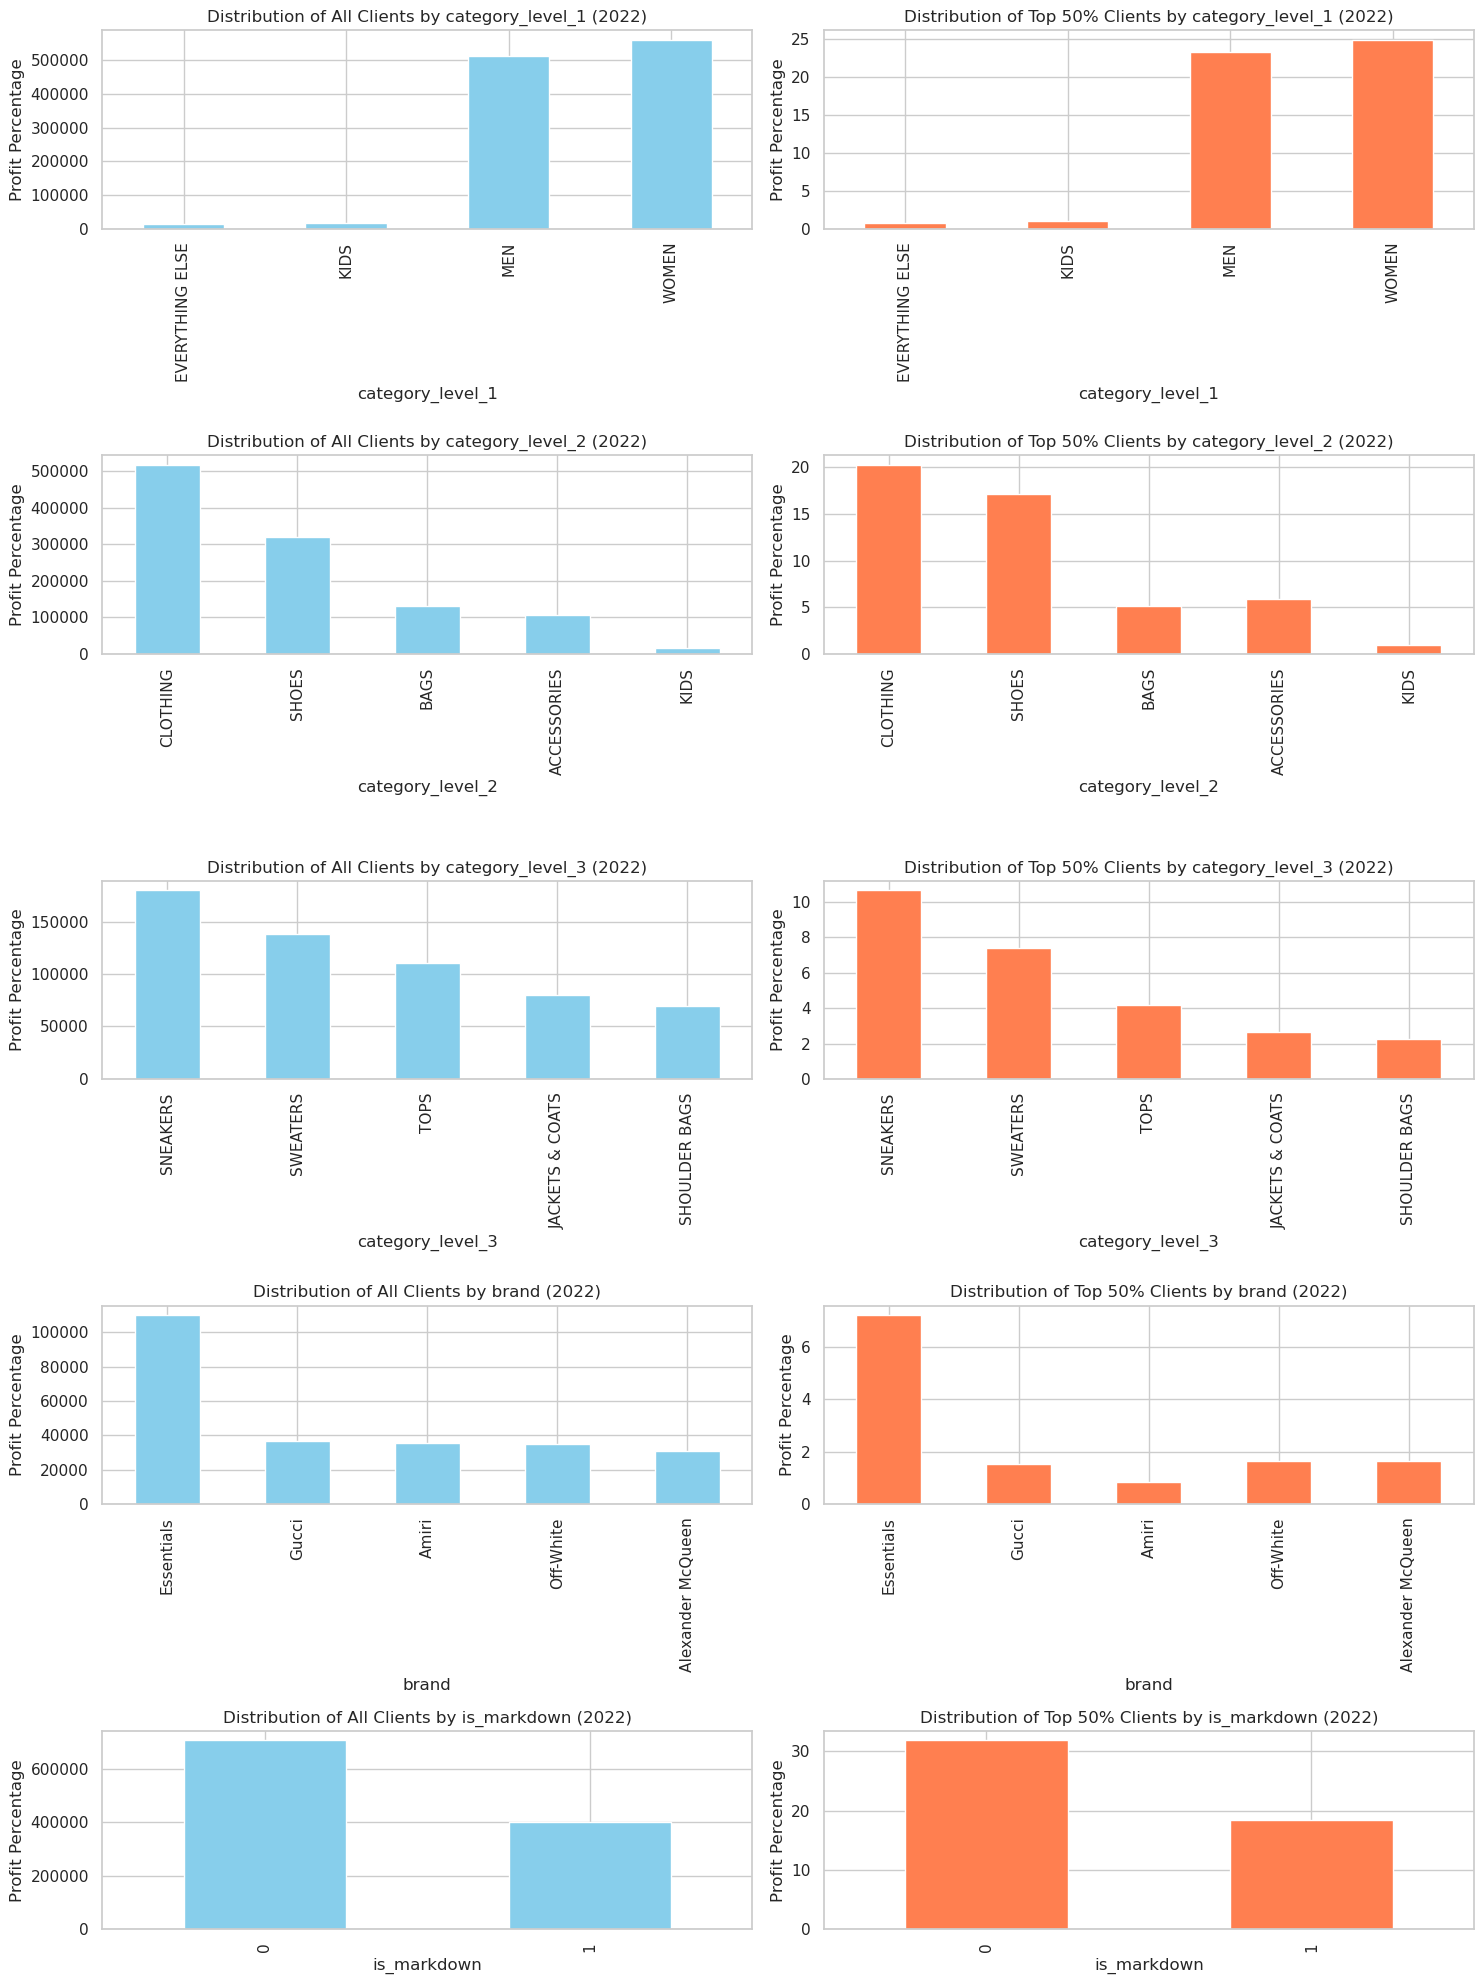

In [187]:
# List of columns to segment by
segmentation_columns = ['category_level_1', 'category_level_2', 'category_level_3', 'brand', 'is_markdown']

# Create a figure with 4x2 subplots (for total and top 50% across the 4 segmentation columns)
fig, ax = plt.subplots(len(segmentation_columns), 2, figsize=(15, 20))

for idx, col in enumerate(segmentation_columns):
    # Get total profit for all clients and top 50% clients
    total_segment_profit = sales.groupby(col)['gross_profit'].sum()
    low_50_segment_profit = sales[sales['member_id'].isin(low_clients['member_id'])].groupby(col)['gross_profit'].sum()
    top_50_segment_profit = sales[sales['member_id'].isin(top_clients['member_id'])].groupby(col)['gross_profit'].sum()
    
    # Calculate profit percentages
    total_profit = total_segment_profit.sum()
    low_50_segment_percent = (low_50_segment_profit / total_profit) * 100
    top_50_segment_percent = (top_50_segment_profit / total_profit) * 100
    
    # Plot only the top 5 profit values if there are more than 5 unique categorical values
    if len(total_segment_profit) > 5:
        top_total_segment_profit = total_segment_profit.sort_values(ascending=False).head(5)
        top_low_50_segment_percent = (low_50_segment_profit[top_total_segment_profit.index] / total_profit) * 100
        top_top_50_segment_percent = (top_50_segment_profit[top_total_segment_profit.index] / total_profit) * 100
        
        top_total_segment_profit.plot(kind='bar', ax=ax[idx, 0], color='skyblue')
        top_low_50_segment_percent.plot(kind='bar', ax=ax[idx, 1], color='coral')
    else:
        total_segment_profit.plot(kind='bar', ax=ax[idx, 0], color='skyblue')
        low_50_segment_percent.plot(kind='bar', ax=ax[idx, 1], color='coral')
    
    ax[idx, 0].set_title(f'Distribution of All Clients by {col} (2022)')
    ax[idx, 0].set_ylabel('Profit Percentage')
    ax[idx, 1].set_title(f'Distribution of Top 50% Clients by {col} (2022)')
    ax[idx, 1].set_ylabel('Profit Percentage')

# Adjust layout
plt.tight_layout()
plt.show()


,member_id,shipping_region_name,gross_profit,cumulative_gross_profit
293,43544991,Korea (South),1054.108324,549310.420014
605,50783451,Korea (South),1050.856328,550361.276343
1848,82246321,United States,1045.971629,551407.247972
702,52886861,United States,1044.064406,552451.312378
183,41048131,United States,1030.730128,553482.042505
